## Historic Redlining + Health Index Maps
### Team Code & Cry

In this notebook, we've pulled together the geographic data and boundaries from historic redlining maps, per the [Mapping Inequality Project](https://dsl.richmond.edu/panorama/redlining/#loc=13/37.76/-122.445&city=san-francisco-ca). Although this notebook mainly recreates existing redlining maps, it does so in a way that is more interactive and can be used in conjunction with other data sets throughout the entirety of our project. Additionally, it allows us to situate historically redlined areas within the context of current neighborhood boundaries.

As seen below, we start by simply processing and visualizing the original boundaries of redlined areas within San Francisco. Then, based on work done by the Mapping Inequality Project to assign these redlined boundaries to 2020 census tracts, we create interactive redlining maps that can be used to figure out how larger neighborhood groups were graded within the context of the original HOLC redlining maps.

## Mapping Redlining to (2020) Census Tract Boundaries

Now that we have visualized the original HOLC map for San Francisco, it’s time to try and retrofit
these redlined areas to 2020 census tracts. Ultimately, the goal is to merge data and create maps
that not only shows the grade assigned to each tract, but the larger neighborhood to which that
grade now applies.

In [49]:
# import libraries
import pandas as pd
import geopandas as gpd

# to give more power to your figures (plots)
import matplotlib.pyplot as plt

import contextily as ctx

In [47]:
# bringing over the redlining to census tract data from the Mapping Inequality Project github
ct = gpd.read_file("https://raw.githubusercontent.com/americanpanorama/Census_HOLC_Research/main/2010_Census_Tracts/holc_census_tracts.geojson")

In [48]:
ct.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 39750 entries, 0 to 39749
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   holc_id     39750 non-null  object  
 1   holc_grade  39750 non-null  object  
 2   id          39750 non-null  int64   
 3   polygon_id  39750 non-null  int64   
 4   sheets      39750 non-null  int64   
 5   name        39750 non-null  object  
 6   municipali  39750 non-null  object  
 7   holc_area   39750 non-null  float64 
 8   year        39750 non-null  object  
 9   msamd       39750 non-null  object  
 10  state_code  39750 non-null  object  
 11  county_cod  39750 non-null  object  
 12  census_tra  39750 non-null  object  
 13  geoid       39750 non-null  object  
 14  tract_prop  39750 non-null  float64 
 15  holc_prop   39750 non-null  float64 
 16  map_id      39750 non-null  int64   
 17  st_name     39750 non-null  object  
 18  state       39750 non-null  object  
 

Wow, this is a huge file. It seems that the Mapping Inequality Project lets you bring over
2010 census tract/redlining data for all U.S. cities at the same time.
In a bit, we’ll need ot run a loop so that we’re just working with data from San Francisco, specifically.

In [51]:
#seeing what the data looks like
ct.head(5)

,holc_id,holc_grade,id,polygon_id,sheets,name,municipali,holc_area,year,msamd,state_code,county_cod,census_tra,geoid,tract_prop,holc_prop,map_id,st_name,state,geometry
0,C2,C,10,230,1,West End and Oakwood Place,,0.841822,2019,13820,01,073,003900,01073003900,0.000497,0.000509,10,Birmingham,AL,"MULTIPOLYGON (((-86.85054 33.50001, -86.85037 ..."
1,C1,C,13,8504,0,,,2.141216,2019,30780,05,119,001100,05119001100,0.000037,0.000020,13,Little Rock,AR,"MULTIPOLYGON (((-92.30322 34.73189, -92.30294 ..."
2,D63,D,16,7493,1,,,5.159042,2019,31084,06,037,576403,06037576403,0.007258,0.000176,16,Los Angeles (central),CA,"MULTIPOLYGON (((-118.16763 33.78261, -118.1687..."
3,C33,C,16,7612,1,,,0.620616,2019,31084,06,037,183220,06037183220,0.000615,0.000205,16,Los Angeles (central),CA,"MULTIPOLYGON (((-118.18344 34.11688, -118.1834..."
4,B9,B,16,7760,1,,,0.885915,2019,31084,06,037,141304,06037141304,0.415928,0.128954,16,Los Angeles (central),CA,"MULTIPOLYGON (((-118.44870 34.15688, -118.4488..."


In [53]:
# creating a query to just pull redlining/census tract data that falls within San Francisco
ct.query("st_name == 'San Francisco'")

,holc_id,holc_grade,id,polygon_id,sheets,name,municipali,holc_area,year,msamd,state_code,county_cod,census_tra,geoid,tract_prop,holc_prop,map_id,st_name,state,geometry
18,C25,C,20,798,1,,,0.523604,2019,41884,06,075,021000,06075021000,0.142611,0.032853,20,San Francisco,CA,"MULTIPOLYGON (((-122.42379 37.75200, -122.4240..."
294,B3,B,20,712,1,,,0.061019,2019,41884,06,075,980200,06075980200,0.001351,0.015405,20,San Francisco,CA,"MULTIPOLYGON (((-122.49345 37.78163, -122.4930..."
332,B17,B,20,766,1,,,0.287912,2019,41884,06,075,032802,06075032802,0.000593,0.000514,20,San Francisco,CA,"MULTIPOLYGON (((-122.48573 37.74822, -122.4846..."
359,C6,C,20,727,1,,,0.157889,2019,41884,06,075,013300,06075013300,0.083610,0.118855,20,San Francisco,CA,"MULTIPOLYGON (((-122.44540 37.78744, -122.4455..."
360,C12,C,20,746,1,,,0.196928,2019,41884,06,075,015802,06075015802,0.443265,0.148399,20,San Francisco,CA,"MULTIPOLYGON (((-122.43880 37.77678, -122.4388..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8008,D16,D,20,807,1,,,0.980928,2019,41884,06,075,023001,06075023001,0.764885,0.200564,20,San Francisco,CA,"MULTIPOLYGON (((-122.39765 37.73876, -122.3988..."
8010,D15,D,20,810,1,,,0.362707,2019,41884,06,075,060700,06075060700,0.000226,0.000704,20,San Francisco,CA,"MULTIPOLYGON (((-122.39495 37.76524, -122.3949..."
8013,D15,D,20,810,1,,,0.362707,2019,41884,06,075,022802,06075022802,0.110221,0.034129,20,San Francisco,CA,"MULTIPOLYGON (((-122.40618 37.76158, -122.4061..."
8018,D15,D,20,810,1,,,0.362707,2019,41884,06,075,022702,06075022702,0.807682,0.244037,20,San Francisco,CA,"MULTIPOLYGON (((-122.39340 37.76020, -122.3937..."


Great, that worked! It looks like there are 495 areas that are fitted to 2010 census tracts in
San Francisco. Let’s try to map them and figure out their rpesective HOLC grade and current
neighborhood:

In [54]:
# create a list of routes
cities = ["San Francisco"]

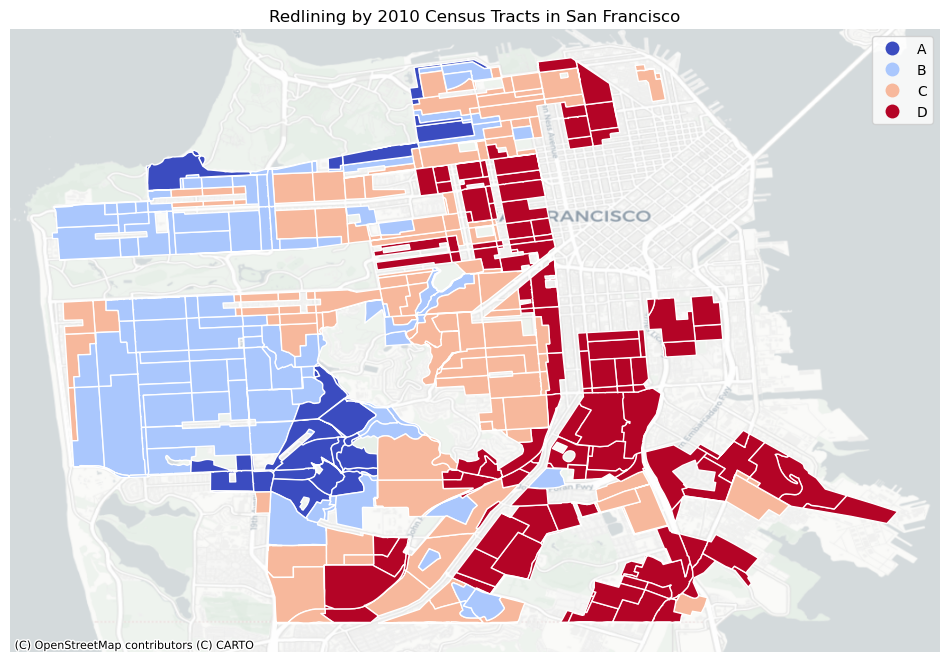

In [55]:
# # creating a color coded map of SF census tracts, according to HOLC grade
for st_name in cities:

    # map it
    fig, ax = plt.subplots(figsize=(12,10))

    # map options: notice the query to filter by individual city
    ct[ct.st_name == st_name].plot(column = 'holc_grade',legend=True,
  edgecolor='white',cmap = 'coolwarm',ax=ax)
    # no axes
    ax.axis('off')

    # title
    ax.set_title('Redlining by 2010 Census Tracts in San Francisco')
    
    ctx.add_basemap(ax,  source=ctx.providers.CartoDB.Positron, crs=4326)

In [78]:
#bringing in the SF Neighborhood Analysis by 2020 Census Tract spatial data from DataSF to merge
nhoods = gpd.read_file('data/SF2020_Neighborhoods_CTs.geojson')

In [79]:
nhoods.head(4)

,name,neighborhoods_analysis_boundaries,tractce,sup_dist_2022,data_loaded_at,county_fp,state_fp,sup_dist_2012,data_as_of,object_id,geoid,geometry
0,9809,Bayview Hunters Point,980900,10,2022-07-08 14:12:00,075,06,10,2022-07-08 21:09:48.141,242,06075980900,"MULTIPOLYGON (((-122.37276 37.74551, -122.3727..."
1,9806,Bayview Hunters Point,980600,10,2022-07-08 14:12:00,075,06,10,2022-07-08 21:09:48.141,241,06075980600,"MULTIPOLYGON (((-122.36519 37.73373, -122.3665..."
2,9805.01,McLaren Park,980501,10,2022-07-08 14:12:00,075,06,10,2022-07-08 21:09:48.141,240,06075980501,"MULTIPOLYGON (((-122.40667 37.71921, -122.4069..."
3,9804.01,The Farallones,980401,4,2022-07-08 14:12:00,075,06,1,2022-07-08 21:09:48.141,239,06075980401,"MULTIPOLYGON (((-123.00360 37.69325, -123.0040..."


In [80]:
#dropping the Farrollones census tract because it has messed with our maps in the past
nhoods = nhoods.drop(labels=3, axis=0)

In [81]:
#defining which columns to keep moving forward
columns_to_keep = ['neighborhoods_analysis_boundaries',
                   'tractce']

In [82]:
#looing at the data and columns we've decided to keep
nhoods2 = nhoods[columns_to_keep].copy()
nhoods2

,neighborhoods_analysis_boundaries,tractce
0,Bayview Hunters Point,980900
1,Bayview Hunters Point,980600
2,McLaren Park,980501
4,Bayview Hunters Point,061200
5,Chinatown,061102
...,...,...
237,Russian Hill,010901
238,Chinatown,010702
239,North Beach,010401
240,Tenderloin,012204


In [83]:
#renaming the two remaining columns
nhoods2.columns = ['Neighborhood', 
                  'Census Tract',]

In [84]:
#double checking the renamining worked
nhoods2.head(3)

,Neighborhood,Census Tract
0,Bayview Hunters Point,980900
1,Bayview Hunters Point,980600
2,McLaren Park,980501


In [87]:
#creating a full FIPS code column that matches the formatting of the Mapping Inequality Project data 
#this will enable us to finally merge the two data sets
nhoods2['geoid'] ='06' + '075' + nhoods2['Census Tract']

In [88]:
#double checking that the merge worked
nhoods2.head(3)

,Neighborhood,Census Tract,geoid
0,Bayview Hunters Point,980900,06075980900
1,Bayview Hunters Point,980600,06075980600
2,McLaren Park,980501,06075980501


In [89]:
#merging the two data sets so that we can visualize the redlined areas alongside their grades and neighborhoods
sf=ct.merge(nhoods2,on="geoid")

In [90]:
sf.sample(3)

,holc_id,holc_grade,id,polygon_id,sheets,name,municipali,holc_area,year,msamd,...,census_tra,geoid,tract_prop,holc_prop,map_id,st_name,state,geometry,Neighborhood,Census Tract
292,,C,20,811,1,,,0.034794,2019,41884,...,030900,06075030900,0.048665,1.000000,20,San Francisco,CA,"MULTIPOLYGON (((-122.47216 37.72731, -122.4719...",West of Twin Peaks,030900
196,B7,B,20,723,1,,,0.042949,2019,41884,...,040100,06075040100,0.038289,0.144436,20,San Francisco,CA,"MULTIPOLYGON (((-122.46387 37.78672, -122.4639...",Inner Richmond,040100
67,B35,B,20,794,1,,,0.057635,2019,41884,...,025403,06075025403,0.286828,0.997769,20,San Francisco,CA,"MULTIPOLYGON (((-122.42098 37.73501, -122.4222...",Bernal Heights,025403


In [91]:
#pulling info on our new, merged data set
sf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 407 entries, 0 to 406
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   holc_id       407 non-null    object  
 1   holc_grade    407 non-null    object  
 2   id            407 non-null    int64   
 3   polygon_id    407 non-null    int64   
 4   sheets        407 non-null    int64   
 5   name          407 non-null    object  
 6   municipali    407 non-null    object  
 7   holc_area     407 non-null    float64 
 8   year          407 non-null    object  
 9   msamd         407 non-null    object  
 10  state_code    407 non-null    object  
 11  county_cod    407 non-null    object  
 12  census_tra    407 non-null    object  
 13  geoid         407 non-null    object  
 14  tract_prop    407 non-null    float64 
 15  holc_prop     407 non-null    float64 
 16  map_id        407 non-null    int64   
 17  st_name       407 non-null    object  
 18  st

In [94]:
#continuing to clean the data and rename which columns we want to keep
columns_to_keep = ['Neighborhood',
                    'Census Tract', 
                  'holc_grade',
                  'geometry']

In [95]:
sf2 = sf[columns_to_keep].copy()
sf2.head(3)

,Neighborhood,Census Tract,holc_grade,geometry
0,Mission,021000,C,"MULTIPOLYGON (((-122.42379 37.75200, -122.4240..."
1,Mission,021000,C,"MULTIPOLYGON (((-122.42393 37.74789, -122.4239..."
2,Mission,021000,D,"MULTIPOLYGON (((-122.42137 37.74813, -122.4215..."


In [96]:
#renaming columns
sf2.columns = ['Neighborhood',
                   'Census Tract', 
                  'HOLC Grade',
                  'geometry']

In [97]:
#checking to see if our column renaming worked
sf2.head(3)

,Neighborhood,Census Tract,HOLC Grade,geometry
0,Mission,021000,C,"MULTIPOLYGON (((-122.42379 37.75200, -122.4240..."
1,Mission,021000,C,"MULTIPOLYGON (((-122.42393 37.74789, -122.4239..."
2,Mission,021000,D,"MULTIPOLYGON (((-122.42137 37.74813, -122.4215..."


In [99]:
# creating a more interactive and color coded map, according to HOLC grade
# when you hove over each area, you can see its HOLC grade - as well as the corresponding tract and neighborhood
sf2.explore(
     column="HOLC Grade", # make choropleth based on "holc grade" column
     popup=True, # show all values in popup (on click)
     tiles="cartodbpositron", # use "CartoDB positron" tiles
     cmap="Reds", # use "Reds" matplotlib colormap
     style_kwds=dict(color="white") # use white outline
    )

In [100]:
sf2['FIPS'] ='6' + '075' + sf2['Census Tract']

In [101]:
sf2.head(3)

,Neighborhood,Census Tract,HOLC Grade,geometry,FIPS
0,Mission,021000,C,"MULTIPOLYGON (((-122.42379 37.75200, -122.4240...",6075021000
1,Mission,021000,C,"MULTIPOLYGON (((-122.42393 37.74789, -122.4239...",6075021000
2,Mission,021000,D,"MULTIPOLYGON (((-122.42137 37.74813, -122.4215...",6075021000


In [102]:
health=pd.read_csv('data/sf_healthindex.csv')

In [103]:
health.head(3)

,FIPS,Pollution_Burden_Pctl,Asthma_Pctl,Low_Birth_Weight_Pctl,Cardiovascular_Disease_Pctl,Poverty_Pctl,Health_Index
0,6075023200,88.31,96.44,96.82,45.80,49.12,376.49
1,6075017902,88.51,94.28,98.20,9.73,95.90,386.62
2,6075023103,81.89,96.44,95.32,45.80,97.95,417.40


In [104]:
columns_to_keep = ['FIPS',
                   'Health_Index']

In [105]:
health2 = health[columns_to_keep].copy()
health2.head(3)

,FIPS,Health_Index
0,6075023200,376.49
1,6075017902,386.62
2,6075023103,417.40


In [106]:
health2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   FIPS          195 non-null    int64  
 1   Health_Index  195 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 3.2 KB


In [107]:
health2['FIPS'] = health2['FIPS'].apply(str)

In [108]:
health2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   FIPS          195 non-null    object 
 1   Health_Index  195 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.2+ KB


In [109]:
sf2.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 407 entries, 0 to 406
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Neighborhood  407 non-null    object  
 1   Census Tract  407 non-null    object  
 2   HOLC Grade    407 non-null    object  
 3   geometry      407 non-null    geometry
 4   FIPS          407 non-null    object  
dtypes: geometry(1), object(4)
memory usage: 19.1+ KB


In [110]:
map=sf2.merge(health2,on="FIPS")

In [111]:
map.head(3)

,Neighborhood,Census Tract,HOLC Grade,geometry,FIPS,Health_Index
0,Mission,021000,C,"MULTIPOLYGON (((-122.42379 37.75200, -122.4240...",6075021000,153.72
1,Mission,021000,C,"MULTIPOLYGON (((-122.42393 37.74789, -122.4239...",6075021000,153.72
2,Mission,021000,D,"MULTIPOLYGON (((-122.42137 37.74813, -122.4215...",6075021000,153.72


In [112]:
map.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 407 entries, 0 to 406
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Neighborhood  407 non-null    object  
 1   Census Tract  407 non-null    object  
 2   HOLC Grade    407 non-null    object  
 3   geometry      407 non-null    geometry
 4   FIPS          407 non-null    object  
 5   Health_Index  407 non-null    float64 
dtypes: float64(1), geometry(1), object(4)
memory usage: 22.3+ KB


In [113]:
columns_to_keep = ['Health_Index',
                    'HOLC Grade',
                   'Neighborhood',
                    'Census Tract',
                  'geometry']
map2 = map[columns_to_keep].copy()
map2.head(3)

,Health_Index,HOLC Grade,Neighborhood,Census Tract,geometry
0,153.72,C,Mission,021000,"MULTIPOLYGON (((-122.42379 37.75200, -122.4240..."
1,153.72,C,Mission,021000,"MULTIPOLYGON (((-122.42393 37.74789, -122.4239..."
2,153.72,D,Mission,021000,"MULTIPOLYGON (((-122.42137 37.74813, -122.4215..."


In [114]:
map2.columns = ['Health Index',
                    'HOLC Grade',
                   'Neighborhood',
                    'Census Tract',
                  'geometry']

In [115]:
map2.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 407 entries, 0 to 406
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Health Index  407 non-null    float64 
 1   HOLC Grade    407 non-null    object  
 2   Neighborhood  407 non-null    object  
 3   Census Tract  407 non-null    object  
 4   geometry      407 non-null    geometry
dtypes: float64(1), geometry(1), object(3)
memory usage: 19.1+ KB


In [116]:
m = map2.explore(
     column="Health Index", # make choropleth based on "holc grade" column
     popup=True, # show all values in popup (on click)
     tiles="cartodbpositron", # use "CartoDB positron" tiles
     cmap="Reds", # use "Reds" matplotlib colormap
     style_kwds=dict(color="white") # use white outline
    )
m

In [117]:
m.save('HealthIndex_Map.html')

In [118]:
map2.explore(
     column="HOLC Grade", # make choropleth based on "holc grade" column
     popup=True, # show all values in popup (on click)
     tiles="cartodbpositron", # use "CartoDB positron" tiles
     cmap="Reds", # use "Reds" matplotlib colormap
     style_kwds=dict(color="white") # use white outline
    )
